# Import packages

In [21]:
! pip install pyreadstat
! pip install matplotlib
! pip install statsmodels
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram




# try with new absolute data? 

In [2]:
immune_abs = pd.read_csv("../raw_data/CIBERSORTx_Job13_Results.csv",sep=',')

In [73]:
immune_abs.columns

Index(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value',
       'Correlation', 'RMSE', 'Absolute score (sig.score)'],
      dtype='object')

In [4]:
clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")

In [5]:
immune_abs = immune_abs.rename({'Mixture': 'pat_nr'}, axis='columns')

In [6]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')

In [7]:
immune_abs_clinical=immune_abs.merge(clinical_df, how='inner', on='pat_nr')

In [8]:
immune_abs_clinical.shape

(442, 63)

In [9]:
immune_abs_clinical.head()

pat_nr  B cells naive  B cells memory  Plasma cells  T cells CD8  \
0       1       0.057566             0.0      0.296410     0.174166   
1       4       0.065108             0.0      0.161390     0.101979   
2       5       0.004710             0.0      0.240467     0.062377   
3       9       0.094907             0.0      0.137163     0.101927   
4      10       0.000000             0.0      0.140969     0.088889   

   T cells CD4 naive  T cells CD4 memory resting  \
0                0.0                    0.125508   
1                0.0                    0.203128   
2                0.0                    0.355455   
3                0.0                    0.238005   
4                0.0                    0.335134   

   T cells CD4 memory activated  T cells follicular helper  \
0                      0.000000                   0.158470   
1                      0.067638                   0.090831   
2                      0.000000                   0.000000   
3                      0.000000                   0.003426   
4                      0.100240                   0.047378   

   T cells regulatory (Tregs)  ...  orr1  dpr1  ets_cat  SYNCH_META  \
0                    0.074527  ...   1.0   NaN      NaN         2.0   
1                    0.078986  ...   1.0   NaN      0.0         1.0   
2                    0.027076  ...   1.0   NaN      1.0         1.0   
3                    0.095790  ...   1.0   NaN      1.0         2.0   
4                    0.114226  ...   0.0   NaN      1.0         2.0   

   PRIMARY_RES  RADIOVORHER   LK   AP  CTX_ADJ  filter_$  
0          1.0          1.0  2.0  1.0      1.0       1.0  
1          1.0          0.0  2.0  2.0      0.0       1.0  
2          1.0          0.0  1.0  1.0      0.0       1.0  
3          1.0          0.0  1.0  1.0      0.0       1.0  
4          1.0          0.0  1.0  1.0      0.0       1.0  

[5 rows x 63 columns]

In [325]:
immune_clinical[['skin_rash', 'ets_cat','os_time_mo','predictedCMS']][immune_abs_clinical['os_time_mo']<20]

skin_rash  ets_cat  os_time_mo  predictedCMS
1          0.0      0.0   16.459959           2.0
2          0.0      1.0   14.817248           NaN
5          0.0      0.0   16.295688           4.0
6          1.0      1.0    7.063655           NaN
7          1.0      NaN   13.634497           NaN
..         ...      ...         ...           ...
429        0.0      0.0   18.529774           2.0
430        0.0      0.0    7.753593           4.0
434        0.0      1.0    3.351129           4.0
438        0.0      NaN    4.829569           3.0
439        0.0      0.0   14.587269           NaN

[180 rows x 4 columns]

In [358]:
s_dict = {0:50,1: 300, 'nan':1}
s_dict

{0: 50, 1: 300, 'nan': 1}

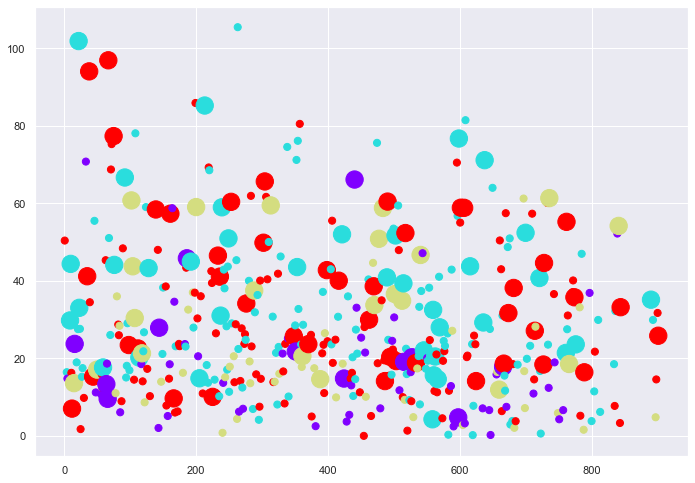

In [362]:
plt.scatter(immune_clinical["pat_nr"],immune_clinical["os_time_mo"],\
            c=immune_clinical['nearestCMS'],\
            s=immune_clinical['skin_rash'].map(s_dict),
            cmap='rainbow');

In [10]:
cetux_abs = immune_abs_clinical[immune_abs_clinical.arm == 1.0]

In [11]:
X_abs = cetux_abs.iloc[:,1:23]
scaler = StandardScaler()
scaler.fit(X_abs)
scaler.transform(X_abs)
target_abs = cetux_abs["skin_rash"]
target_abs

3      1.0
4      1.0
6      1.0
7      1.0
8      1.0
      ... 
433    1.0
435    1.0
436    1.0
438    0.0
441    1.0
Name: skin_rash, Length: 218, dtype: float64

# Read data from raw_data folder

## "immune_clinical" data set

In [3]:
immune_clinical = pd.read_csv("../raw_data/immune_clinical.csv")

In [4]:
immune_clinical.shape

(442, 62)

In [108]:
immune_clinical.head()

pat_nr  B cells naive  B cells memory  Plasma cells  T cells CD8  \
0       1       0.040607             0.0      0.209086     0.122856   
1       4       0.049146             0.0      0.121825     0.076978   
2       5       0.003186             0.0      0.162668     0.042196   
3       9       0.067346             0.0      0.097330     0.072327   
4      10       0.000000             0.0      0.105039     0.066233   

   T cells CD4 naive  T cells CD4 memory resting  \
0                0.0                    0.088533   
1                0.0                    0.153331   
2                0.0                    0.240454   
3                0.0                    0.168887   
4                0.0                    0.249715   

   T cells CD4 memory activated  T cells follicular helper  \
0                      0.000000                   0.111784   
1                      0.051057                   0.068564   
2                      0.000000                   0.000000   
3                      0.000000                   0.002431   
4                      0.074691                   0.035303   

   T cells regulatory (Tregs)  ...  orr1  dpr1  ets_cat  SYNCH_META  \
0                    0.052571  ...   1.0   NaN      NaN         2.0   
1                    0.059623  ...   1.0   NaN      0.0         1.0   
2                    0.018316  ...   1.0   NaN      1.0         1.0   
3                    0.067972  ...   1.0   NaN      1.0         2.0   
4                    0.085112  ...   0.0   NaN      1.0         2.0   

   PRIMARY_RES  RADIOVORHER   LK   AP  CTX_ADJ  filter_$  
0          1.0          1.0  2.0  1.0      1.0       1.0  
1          1.0          0.0  2.0  2.0      0.0       1.0  
2          1.0          0.0  1.0  1.0      0.0       1.0  
3          1.0          0.0  1.0  1.0      0.0       1.0  
4          1.0          0.0  1.0  1.0      0.0       1.0  

[5 rows x 62 columns]

In [5]:
immune_clinical.columns

Index(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value',
       'Correlation', 'RMSE', 'study', 'CET1_REST0', 'arm', 'sex', 'age',
       'ecog', 'skin_rash', 'MOL_SG', 'RNA_Probe', 'predictedCMS',
       'nearestCMS', 'detaiL_primloc', 'primeloc_side', 'liver', 'lung',
       'LKMETS', 'PERITONEAL', 'other', 'liver_only', 'no_organs', 'secresec',
       'pfs', 'pfs_time_mo', 'os', 'os_time_mo', 'bor1', 'orr1', 'dpr1',
       'ets_cat', 'SYNCH_META', 'PRIMARY_RES', 'RADIOVORHER', 'LK', 'AP',
       'CTX

In [333]:
(immune_clinical["CET1_REST0"]== 0).sum()

224

In [331]:
(immune_clinical["arm"] == 1).sum()

218

## "cetux" data file of cetuximab arm of study, reduced columns


In [6]:
cetux = pd.read_csv("../raw_data/cetux.csv")
cetux.head()

pat_nr  B cells naive  B cells memory  Plasma cells  T cells CD8  \
0       9       0.067346        0.000000      0.097330     0.072327   
1      10       0.000000        0.000000      0.105039     0.066233   
2      12       0.065798        0.000000      0.118399     0.111458   
3      15       0.010223        0.000000      0.186072     0.193724   
4      16       0.000000        0.013582      0.056297     0.080645   

   T cells CD4 naive  T cells CD4 memory resting  \
0                0.0                    0.168887   
1                0.0                    0.249715   
2                0.0                    0.281396   
3                0.0                    0.283032   
4                0.0                    0.336947   

   T cells CD4 memory activated  T cells follicular helper  \
0                      0.000000                   0.002431   
1                      0.074691                   0.035303   
2                      0.000000                   0.000000   
3                      0.000000                   0.000000   
4                      0.000000                   0.035983   

   T cells regulatory (Tregs)  ...  Dendritic cells resting  \
0                    0.067972  ...                 0.071104   
1                    0.085112  ...                 0.000000   
2                    0.069544  ...                 0.024802   
3                    0.144012  ...                 0.000000   
4                    0.057663  ...                 0.079572   

   Dendritic cells activated  Mast cells resting  Mast cells activated  \
0                   0.000000                 0.0              0.188876   
1                   0.009239                 0.0              0.134230   
2                   0.000000                 0.0              0.086495   
3                   0.000000                 0.0              0.081489   
4                   0.010232                 0.0              0.045427   

   Eosinophils  Neutrophils  P-value  sex   age  skin_rash  
0     0.000000     0.074924    0.004  1.0  61.0        1.0  
1     0.000000     0.070198    0.024  1.0  74.0        1.0  
2     0.032828     0.051155    0.002  1.0  73.0        1.0  
3     0.000000     0.004522    0.034  1.0  68.0        1.0  
4     0.000000     0.095906    0.022  1.0  42.0        1.0  

[5 rows x 27 columns]

## "bevacizumab" data file of bevacizumab arm, reduced columns

In [340]:
bevacizumab = pd.read_csv("../raw_data/bevacizumab.csv")
bevacizumab.shape

(224, 27)

# Data exploration

## From cetux create dataframe X and target y

In [7]:
X = cetux.iloc[:,1:23]
X.shape

(218, 22)

In [10]:
target = cetux["skin_rash"]
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
213    1.0
214    1.0
215    1.0
216    0.0
217    1.0
Name: skin_rash, Length: 218, dtype: float64

In [344]:
wrong_X = bevacizumab.iloc[:,1:23]
wrong_target = bevacizumab["skin_rash"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
219    0.0
220    0.0
221    0.0
222    0.0
223    0.0
Name: skin_rash, Length: 224, dtype: float64

In [11]:
features = X.columns
features

Index(['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils'],
      dtype='object')

## How many zero values in totalX = immune_clinical.iloc[:,1:23]?

In [116]:
totalX = immune_clinical.iloc[:,1:23]
totalX.isin([0.0000]).sum(axis=0)

B cells naive                    92
B cells memory                  358
Plasma cells                      2
T cells CD8                       2
T cells CD4 naive               438
T cells CD4 memory resting        2
T cells CD4 memory activated    321
T cells follicular helper       167
T cells regulatory (Tregs)       42
T cells gamma delta             437
NK cells resting                100
NK cells activated              321
Monocytes                       137
Macrophages M0                  228
Macrophages M1                  104
Macrophages M2                   10
Dendritic cells resting         205
Dendritic cells activated       328
Mast cells resting              273
Mast cells activated             68
Eosinophils                     435
Neutrophils                      21
dtype: int64

## Reduce cetux to cetux_new_p (by p-values <= 0.05)

In [117]:
cetux_lowP = cetux[cetux["P-value"] <= 0.05]
cetux_lowP.shape

(163, 27)

## Plot histograms and boxplots of the immune cell abundances

### Histograms of immune cells

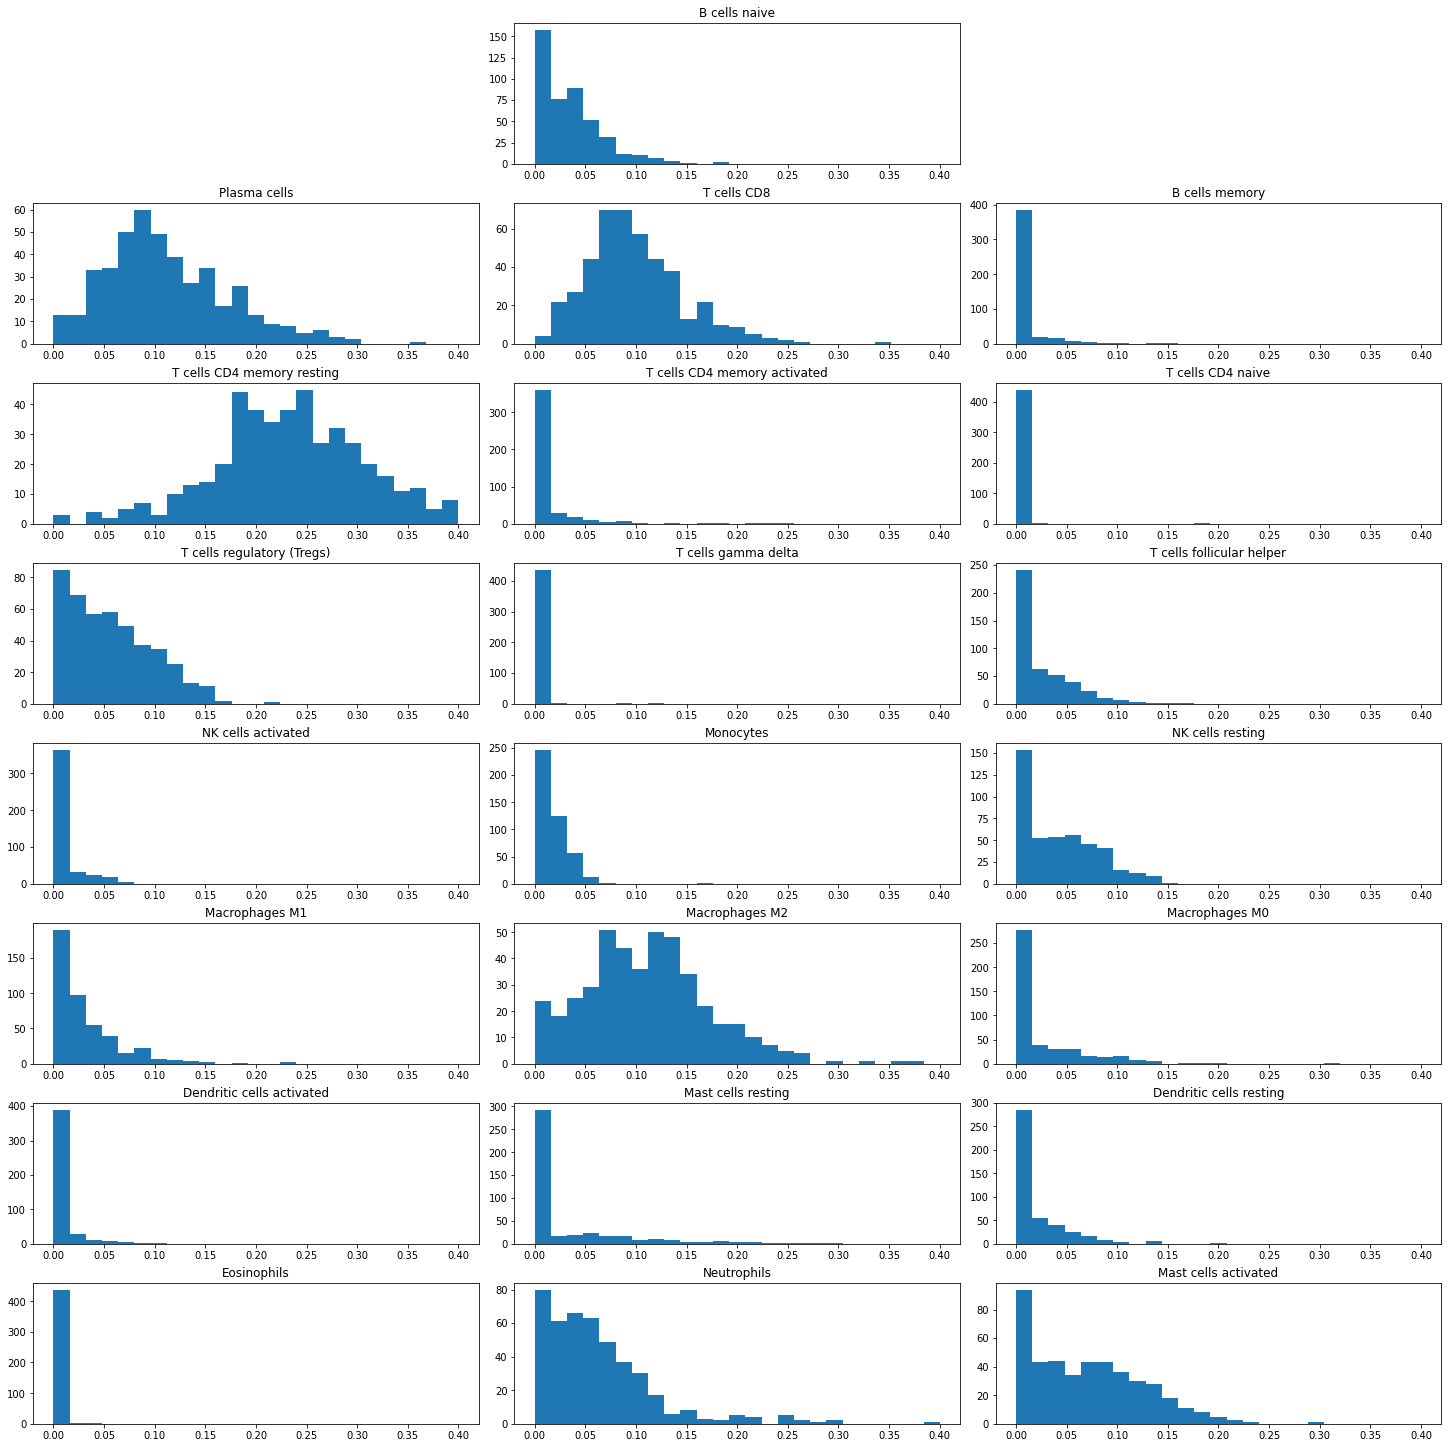

In [13]:
fig = plt.figure(constrained_layout=True, figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.hist(immune_clinical.iloc[:, i], bins = 25, range=(0,0.4))
    ax.title.set_text(immune_clinical.iloc[:,i].name);

### Boxplots of immune cells

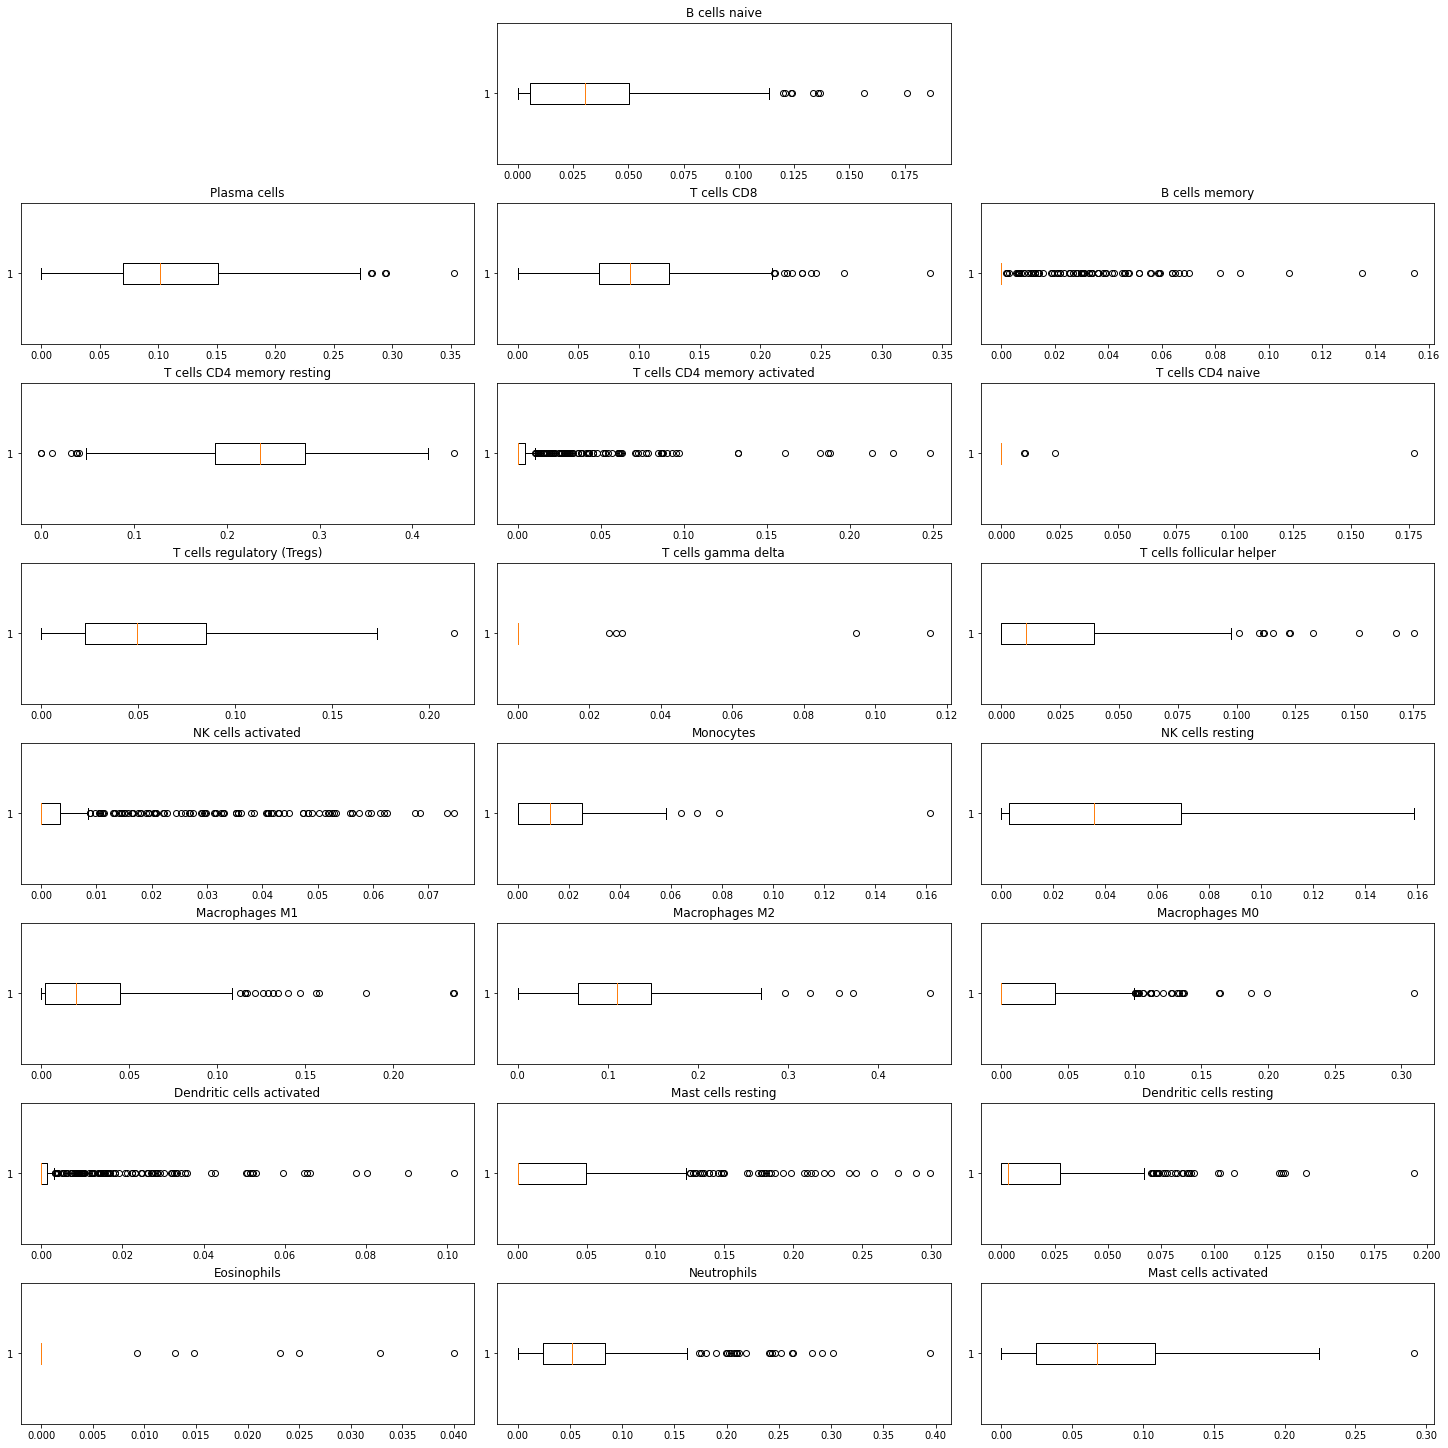

In [14]:
fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.boxplot(x = immune_clinical.iloc[:, i], vert=False)
    ax.title.set_text(immune_clinical.iloc[:,i].name);

### 2d scatter plots of different immune cells, skin rash color coded!

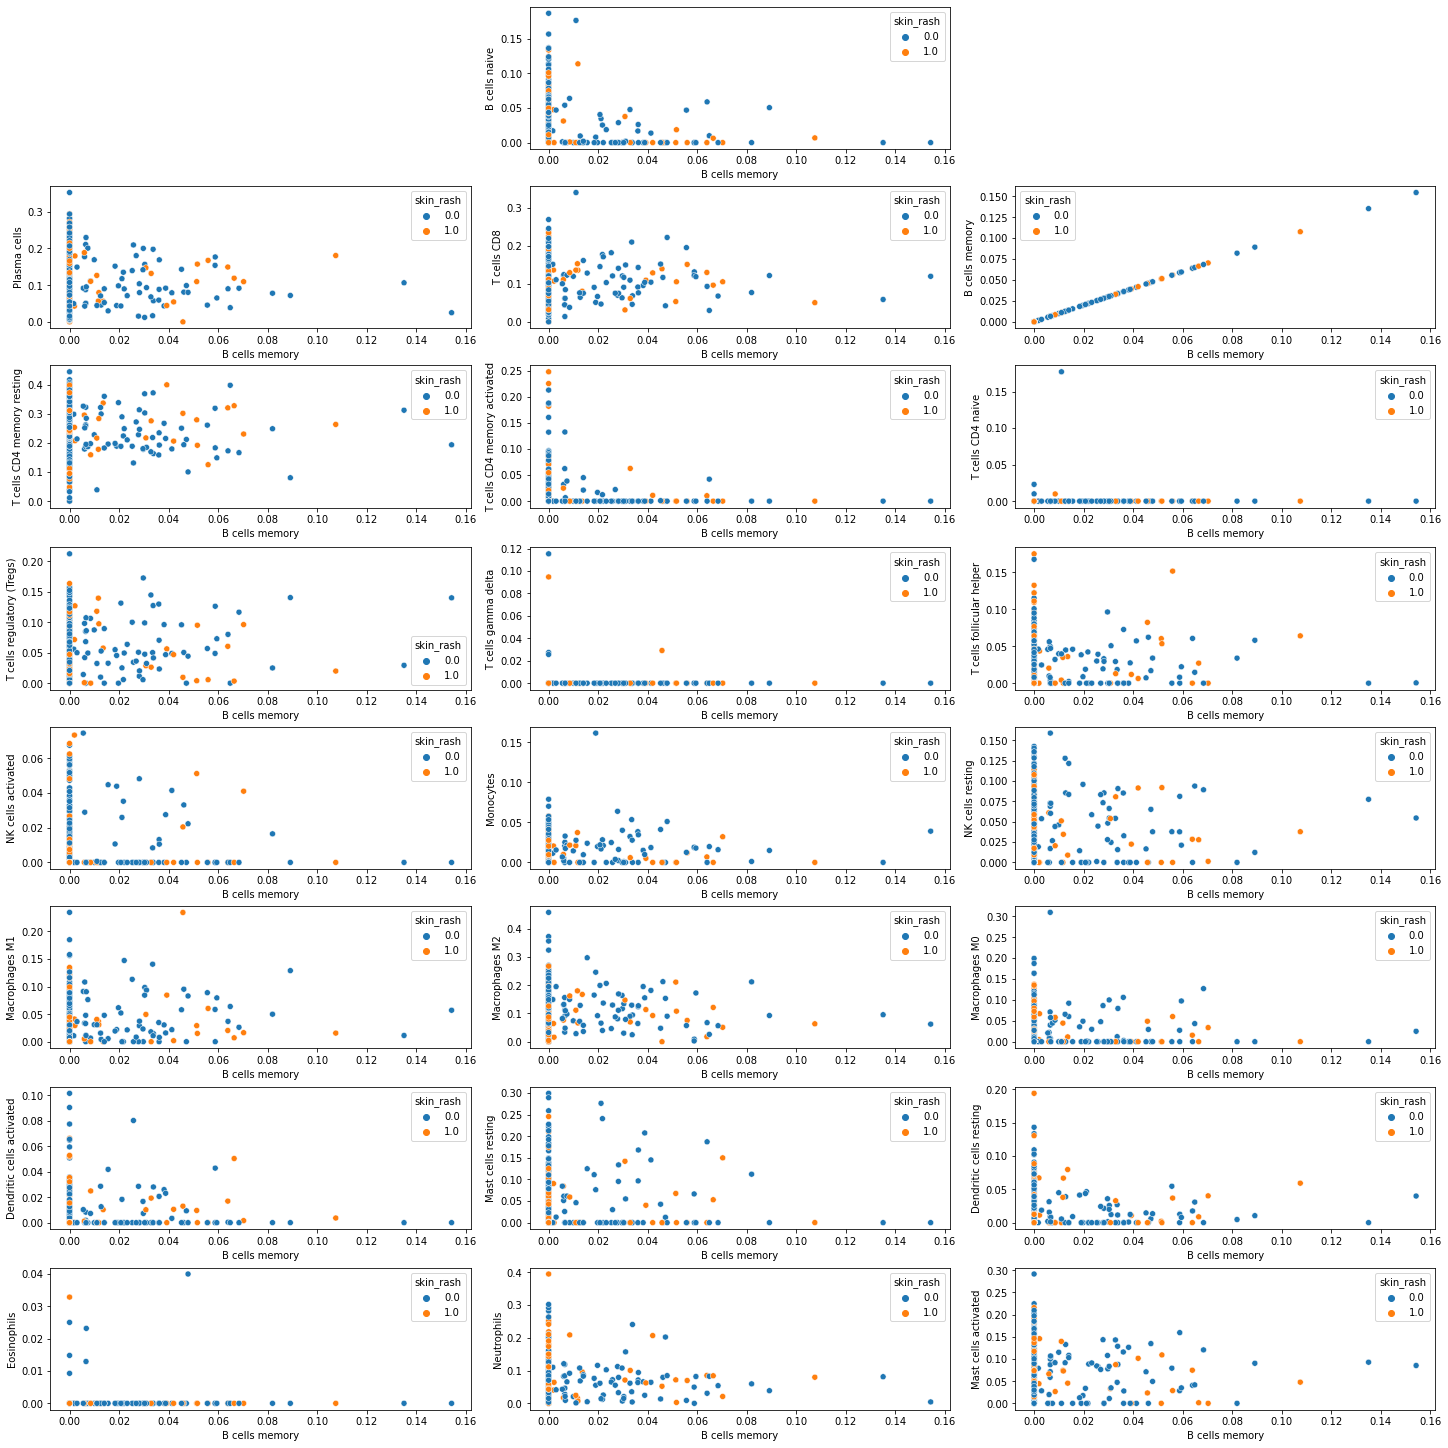

In [15]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

#sns.scatterplot(data=cdf, x=cdf.iloc[:,1], y=cdf.iloc[:,20],hue="skin_rash")

fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

cell_on_xaxis = 2

for i in range(1,23):
    sns.scatterplot(data=immune_clinical, x=immune_clinical.iloc[:,cell_on_xaxis], y=immune_clinical.iloc[:,i],hue="skin_rash",\
                    ax=fig.add_subplot(gs[round(i/3),i%3]))
    ax.title.set_text(immune_clinical.iloc[:,i].name);

## check for multicolinearity

In [33]:
#X.isin([0.0000]).sum(axis=0)
#X_abs_new = X_abs[X_abs.isin([0.0000])]
#T = add_constant(immune_clinical.iloc[:,1:23])
T = immune_clinical.iloc[:,1:23]
#T = immune_abs_clinical.iloc[:,1:23]
#T = add_constant(X_abs_new)
#X_abs_new

In [34]:
T.shape

(442, 22)

In [28]:
pd.Series([vif(T.values,i) for i in range(T.shape[1])],index=T.columns)

B cells naive                   2.639014
B cells memory                  1.256508
Plasma cells                    4.336841
T cells CD8                     5.922115
T cells CD4 naive               1.181835
T cells CD4 memory resting      8.017881
T cells CD4 memory activated    1.309469
T cells follicular helper       1.989224
T cells regulatory (Tregs)      4.491155
T cells gamma delta             1.149054
NK cells resting                3.562641
NK cells activated              1.838224
Monocytes                       2.402038
Macrophages M0                  1.563920
Macrophages M1                  2.365284
Macrophages M2                  3.840951
Dendritic cells resting         1.529236
Dendritic cells activated       1.328504
Mast cells resting              1.857644
Mast cells activated            4.685993
Eosinophils                     1.068488
Neutrophils                     2.972330
dtype: float64

In [38]:
df_cor = T.corr()
pd.DataFrame(np.linalg.inv(T.corr().values), index = df_cor.index, columns=df_cor.columns)

B cells naive  B cells memory  Plasma cells  \
B cells naive                  5.936292e+15    3.320899e+15  1.118232e+16   
B cells memory                 3.320899e+15    1.857787e+15  6.255650e+15   
Plasma cells                   1.118232e+16    6.255650e+15  2.106439e+16   
T cells CD8                    8.752875e+15    4.896560e+15  1.648798e+16   
T cells CD4 naive              1.569155e+15    8.778215e+14  2.955851e+15   
T cells CD4 memory resting     1.391290e+16    7.783197e+15  2.620803e+16   
T cells CD4 memory activated   5.906167e+15    3.304046e+15  1.112558e+16   
T cells follicular helper      5.566468e+15    3.114011e+15  1.048568e+16   
T cells regulatory (Tregs)     7.758726e+15    4.340410e+15  1.461528e+16   
T cells gamma delta            1.369928e+15    7.663694e+14  2.580563e+15   
NK cells resting               6.895737e+15    3.857634e+15  1.298965e+16   
NK cells activated             2.916784e+15    1.631717e+15  5.494411e+15   
Monocytes                      3.118147e+15    1.744363e+15  5.873721e+15   
Macrophages M0                 7.270657e+15    4.067373e+15  1.369590e+16   
Macrophages M1                 6.564498e+15    3.672332e+15  1.236569e+16   
Macrophages M2                 1.179861e+16    6.600414e+15  2.222530e+16   
Dendritic cells resting        5.181057e+15    2.898403e+15  9.759671e+15   
Dendritic cells activated      2.540578e+15    1.421258e+15  4.785742e+15   
Mast cells resting             1.068414e+16    5.976953e+15  2.012594e+16   
Mast cells activated           1.027508e+16    5.748116e+15  1.935539e+16   
Eosinophils                    5.726687e+14    3.203641e+14  1.078749e+15   
Neutrophils                    1.034112e+16    5.785060e+15  1.947979e+16   

                               T cells CD8  T cells CD4 naive  \
B cells naive                 8.752875e+15       1.569155e+15   
B cells memory                4.896560e+15       8.778215e+14   
Plasma cells                  1.648798e+16       2.955851e+15   
T cells CD8                   1.290584e+16       2.313669e+15   
T cells CD4 naive             2.313669e+15       4.147787e+14   
T cells CD4 memory resting    2.051413e+16       3.677631e+15   
T cells CD4 memory activated  8.708457e+15       1.561192e+15   
T cells follicular helper     8.207582e+15       1.471398e+15   
T cells regulatory (Tregs)    1.144000e+16       2.050883e+15   
T cells gamma delta           2.019916e+15       3.621165e+14   
NK cells resting              1.016755e+16       1.822767e+15   
NK cells activated            4.300706e+15       7.710009e+14   
Monocytes                     4.597609e+15       8.242276e+14   
Macrophages M0                1.072035e+16       1.921871e+15   
Macrophages M1                9.679145e+15       1.735210e+15   
Macrophages M2                1.739668e+16       3.118756e+15   
Dendritic cells resting       7.639306e+15       1.369522e+15   
Dendritic cells activated     3.746002e+15       6.715574e+14   
Mast cells resting            1.575342e+16       2.824165e+15   
Mast cells activated          1.515028e+16       2.716037e+15   
Eosinophils                   8.443820e+14       1.513750e+14   
Neutrophils                   1.524765e+16       2.733494e+15   

                              T cells CD4 memory resting  \
B cells naive                               1.391290e+16   
B cells memory                              7.783197e+15   
Plasma cells                                2.620803e+16   
T cells CD8                                 2.051413e+16   
T cells CD4 naive                           3.677631e+15   
T cells CD4 memory resting                  3.260769e+16   
T cells CD4 memory activated                1.384229e+16   
T cells follicular helper                   1.304614e+16   
T cells regulatory (Tregs)                  1.818414e+16   
T cells gamma delta                         3.210703e+15   
NK cells resting                            1.616155e+16   
NK cells activated                        

***>>> The values of multicolinearity are low (mostly < 5.0). The data is relative anyway and the feature add to one. So, the vif factor is going to be very small anyway...***

# Dimensionality reduction

## Scaling: from X to X_scaled NECESSARY???

In [40]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=features)
X_scaled

B cells naive  B cells memory  Plasma cells  T cells CD8  \
0         1.025411       -0.343705     -0.229827    -0.591112   
1        -1.053443       -0.343705     -0.105382    -0.725687   
2         0.977627       -0.343705      0.110279     0.273048   
3        -0.737874       -0.343705      1.202641     2.089801   
4        -1.053443        0.476041     -0.892163    -0.407410   
..             ...             ...           ...          ...   
213      -1.053443       -0.343705      1.667144    -0.671935   
214       0.262458       -0.343705      0.768996    -0.233877   
215       0.885398       -0.343705      0.876434     0.284845   
216       0.880543       -0.343705     -0.065522    -0.541167   
217      -0.704520       -0.343705      0.362060    -1.485103   

     T cells CD4 naive  T cells CD4 memory resting  \
0            -0.096223                   -0.859374   
1            -0.096223                    0.199197   
2            -0.096223                    0.614112   
3            -0.096223                    0.635537   
4            -0.096223                    1.341637   
..                 ...                         ...   
213          -0.096223                    0.076214   
214          -0.096223                   -1.828033   
215          -0.096223                    0.107505   
216          -0.096223                   -0.599022   
217          -0.096223                    1.001741   

     T cells CD4 memory activated  T cells follicular helper  \
0                       -0.402126                  -0.757977   
1                        1.473281                   0.269138   
2                       -0.402126                  -0.833935   
3                       -0.402126                  -0.833935   
4                       -0.402126                   0.290390   
..                            ...                        ...   
213                     -0.402126                  -0.833935   
214                     -0.402126                   1.170764   
215                     -0.402126                  -0.833935   
216                     -0.402126                  -0.028699   
217                      0.970094                  -0.833935   

     T cells regulatory (Tregs)  T cells gamma delta  ...  Monocytes  \
0                      0.344682             9.142768  ...  -0.890156   
1                      0.744993            -0.107140  ...   1.241060   
2                      0.381390            -0.107140  ...  -0.890156   
3                      2.120576            -0.107140  ...  -0.383587   
4                      0.103924            -0.107140  ...  -0.890156   
..                          ...                  ...  ...        ...   
213                   -0.862800            -0.107140  ...  -0.734048   
214                   -0.491197            -0.107140  ...   0.989127   
215                   -0.880933            -0.107140  ...  -0.233244   
216                   -0.435760            -0.107140  ...  -0.779839   
217                   -0.139723            -0.107140  ...   0.497185   

     Macrophages M0  Macrophages M1  Macrophages M2  Dendritic cells resting  \
0         -0.348337        0.737241       -1.478405                 1.842501   
1         -0.677736       -0.831666       -0.695575                -0.672868   
2         -0.457505        2.239021       -1.723741                 0.204537   
3         -0.677736       -0.368023       -1.562723                -0.672868   
4         -0.371260       -0.831666        1.038779                 2.142076   
..              ...             ...             ...                      ...   
213        0.119230       -0.831666        0.332226                -0.672868   
214        0.899749        0.294801       -1.812747                -0.232003   
215        0.035901       -0.831666       -0.329423                 2.451301   
216       -0.677736       -0.831666        3.709403                -0.672868   
217        1.261591       -0.831666       -1.737361          

<AxesSubplot:>

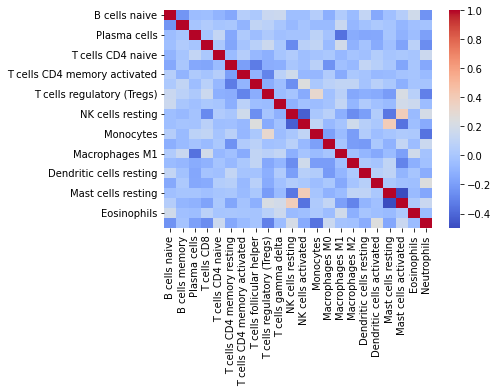

In [43]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

## PCA >>> X_proj

In [57]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca.explained_variance_ratio_


array([1.86761845e-01, 1.60063238e-01, 1.32843617e-01, 1.03691125e-01,
       8.26687830e-02, 6.28698571e-02, 5.53822487e-02, 3.90339692e-02,
       3.57328388e-02, 3.34124872e-02, 2.61333097e-02, 2.08644455e-02,
       1.96007181e-02, 1.75909064e-02, 6.81206209e-03, 5.67930517e-03,
       4.63912717e-03, 3.66546503e-03, 2.32348808e-03, 2.07733726e-04,
       2.34306731e-05, 3.51915472e-31])

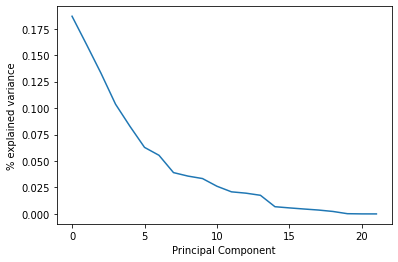

In [80]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

***>>> After plotting the explained variance ratio over the number of components and applying the elbow method: Let's take n_components = 10!***

In [76]:
cs = np.cumsum(pca.explained_variance_ratio_)
cs

array([0.18676185, 0.34682508, 0.4796687 , 0.58335982, 0.66602861,
       0.72889846, 0.78428071, 0.82331468, 0.85904752, 0.89246001,
       0.91859332, 0.93945776, 0.95905848, 0.97664939, 0.98346145,
       0.98914076, 0.99377988, 0.99744535, 0.99976884, 0.99997657,
       1.        , 1.        ])

In [79]:
cs = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(cs)):
    if cs[i] > 0.8:
        print(f'Threshold of 0.8 met at cs[{i}]. '\
             f'n_components should therefore be: {i+1}')
        break    # break here

Threshold of 0.8 met at cs[7]. n_components should therefore be: 8


***>>> The cumulative sum of explained variance exceeds 80% at n_components = 8!***

In [81]:
pca = PCA(n_components = 8)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
W = pca.components_
len(W)

8

In [83]:
W = pd.DataFrame(W.T,
                 index=features,
                 columns=[f'PC{i}' for i in range(1,len(W)+1)])
W

PC1       PC2       PC3       PC4  \
B cells naive                 0.037362  0.036551 -0.067856 -0.146493   
B cells memory               -0.006159  0.003772 -0.005947 -0.016096   
Plasma cells                  0.118054  0.255690 -0.592609  0.590717   
T cells CD8                   0.019227  0.170612 -0.151269 -0.348605   
T cells CD4 naive             0.000953  0.000097  0.000393  0.002806   
T cells CD4 memory resting   -0.767433 -0.520490 -0.118182  0.111144   
T cells CD4 memory activated  0.082028  0.059838  0.008399  0.083906   
T cells follicular helper     0.072559  0.136707  0.079556 -0.071892   
T cells regulatory (Tregs)    0.099477 -0.032135 -0.260796 -0.356101   
T cells gamma delta           0.017101 -0.002449 -0.004560 -0.019462   
NK cells resting              0.130676 -0.235178 -0.028231  0.109545   
NK cells activated           -0.045798  0.086038  0.024213 -0.003375   
Monocytes                    -0.015054 -0.000753 -0.081317 -0.049104   
Macrophages M0                0.160608 -0.023755  0.031110  0.041754   
Macrophages M1               -0.028298  0.007562  0.131942 -0.329705   
Macrophages M2               -0.145333  0.323498  0.411671 -0.044691   
Dendritic cells resting      -0.075781  0.010548  0.018599 -0.048597   
Dendritic cells activated    -0.005206 -0.022126  0.047490  0.033788   
Mast cells resting           -0.292007  0.433679  0.111533  0.152668   
Mast cells activated          0.386641 -0.437427 -0.108445 -0.118838   
Eosinophils                   0.000497 -0.001404 -0.002681 -0.007188   
Neutrophils                   0.255886 -0.248875  0.556989  0.433819   

                                   PC5       PC6       PC7       PC8  
B cells naive                -0.032940  0.203951  0.057765  0.144150  
B cells memory                0.034255 -0.056408 -0.034275  0.024864  
Plasma cells                 -0.163883 -0.247481 -0.115893  0.048941  
T cells CD8                   0.183318 -0.457874  0.217409 -0.585348  
T cells CD4 naive             0.000321 -0.001428  0.000639 -0.002512  
T cells CD4 memory resting   -0.058992 -0.100919  0.009897 -0.009732  
T cells CD4 memory activated -0.080920  0.179499  0.750670  0.027919  
T cells follicular helper     0.024000 -0.090236 -0.029742  0.102420  
T cells regulatory (Tregs)   -0.059211 -0.001982 -0.470845  0.113922  
T cells gamma delta           0.005528  0.022053  0.023003 -0.007730  
NK cells resting             -0.034809  0.128825  0.172479  0.167892  
NK cells activated            0.032737  0.013621 -0.026788 -0.027054  
Monocytes                     0.007892  0.027250 -0.026685 -0.018170  
Macrophages M0                0.176648 -0.019745  0.051660  0.439988  
Macrophages M1                0.197188 -0.295850  0.022650  0.448206  
Macrophages M2               -0.757513 -0.028857 -0.109118 -0.022322  
Dendritic cells resting       0.004896  0.116476  0.057559 -0.187474  
Dendritic cells activated     0.019677  0.001186 -0.017158 -0.030311  
Mast cells resting            0.455341  0.512270 -0.207084 -0.136658  
Mast cells activated         -0.163602  0.400022 -0.138188 -0.310198  
Eosinophils                   0.004284 -0.002710  0.002357  0.003502  
Neutrophils                   0.205785 -0.301661 -0.190310 -0.184295

In [84]:
X_proj = pca.transform(X)
X_proj.shape
X_proj = pd.DataFrame(X_proj, columns=[f'PC{b}' for b in range(1, len(W.columns)+1)])
X_proj

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.109715 -0.066345 -0.030776 -0.046746  0.036490  0.054266 -0.023220   
1    0.039776 -0.079776 -0.032079  0.011007 -0.018903  0.040429  0.025277   
2   -0.014447 -0.072439 -0.064502 -0.046438  0.065787 -0.035751  0.003806   
3   -0.008360 -0.038138 -0.170202 -0.035059  0.028046 -0.057701 -0.014610   
4   -0.096199 -0.057589  0.062866 -0.001579 -0.058028 -0.023403 -0.017531   
..        ...       ...       ...       ...       ...       ...       ...   
213  0.013518  0.003560 -0.018819  0.124965 -0.028627 -0.016642 -0.024852   
214  0.192932 -0.021176 -0.010329  0.052738  0.080656 -0.012475 -0.002132   
215  0.019438 -0.027049 -0.062971  0.019571 -0.026979  0.015490  0.005908   
216 -0.040492  0.140843  0.095934  0.000507 -0.152685  0.032372 -0.039321   
217  0.010808 -0.142710 -0.084272  0.056642  0.019441  0.062278  0.039594   

          PC8  
0   -0.022198  
1   -0.012237  
2    0.029217  
3   -0.045063  
4   -0.028306  
..        ...  
213 -0.006703  
214  0.021460  
215 -0.053823  
216 -0.007608  
217  0.042246  

[218 rows x 8 columns]

### Plots for explained variance ratio for n_components=8

In [85]:
X_proj.std()**2 / ((X.std()**2).sum())

PC1    0.186762
PC2    0.160063
PC3    0.132844
PC4    0.103691
PC5    0.082669
PC6    0.062870
PC7    0.055382
PC8    0.039034
dtype: float64

In [86]:
pca.explained_variance_ratio_

array([0.18676185, 0.16006324, 0.13284362, 0.10369112, 0.08266878,
       0.06286986, 0.05538225, 0.03903397])

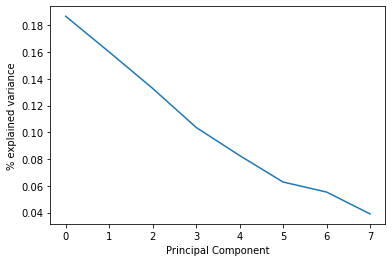

In [87]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

<AxesSubplot:>

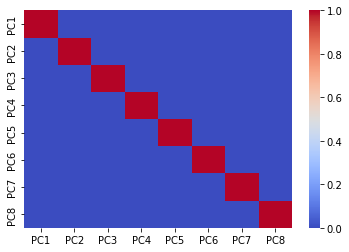

In [88]:
sns.heatmap(pd.DataFrame(X_proj).corr(), cmap='coolwarm')

## t-SNE >>> X_embedded

In [134]:
tsne = TSNE(n_components=3, random_state=0, perplexity=10.0,learning_rate="auto")

In [135]:
X_embedded = tsne.fit_transform(X)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [136]:
X_embedded = pd.DataFrame(X_proj_tsne, columns=[f'tsne{b}' for b in range(1, 3+1)])
X_embedded

NameError: name 'X_proj_tsne' is not defined

## isomap, umap??

## 2d plots before and after projection

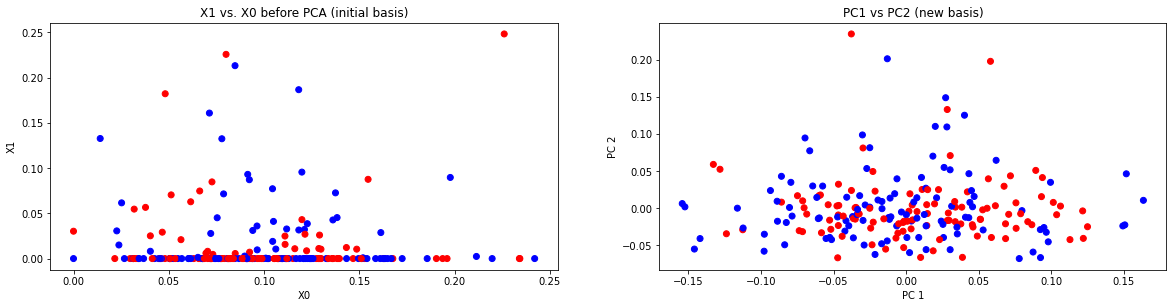

In [90]:
dim1 = 3
dim2 = 6
import matplotlib.pyplot as plt
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,dim1], X.iloc[:,dim2],c=cetux['skin_rash'].map(colors))

plt.subplot(2,2,2)
plt.title('PC1 vs PC2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,dim1], X_proj.iloc[:,dim2],c=cetux['skin_rash'].map(colors));

#plt.subplot(2,2,3)
#plt.title('embedded1 vs embedded2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
#plt.scatter(X_embedded.iloc[:,dim1], X_embedded.iloc[:,dim2],c=cetux['skin_rash'].map(colors));

# Clustering analysis

## KMeans clustering

In [469]:
km = KMeans(n_clusters=4)

In [470]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [471]:
km.cluster_centers_.shape

(4, 22)

In [472]:
type(km.labels_)
km.labels_

array([3, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1, 3, 0, 1, 2, 3,
       3, 1, 0, 0, 2, 0, 0, 0, 2, 3, 1, 0, 1, 0, 2, 3, 2, 2, 0, 0, 0, 2,
       2, 3, 3, 0, 2, 1, 0, 0, 0, 3, 2, 3, 1, 3, 2, 1, 1, 0, 0, 0, 3, 1,
       0, 1, 3, 1, 3, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 3, 3, 0, 2, 2, 1, 0,
       3, 1, 3, 3, 0, 0, 0, 0, 1, 3, 0, 1, 0, 1, 1, 3, 1, 0, 0, 3, 2, 1,
       1, 1, 3, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 3, 1, 3, 0, 0, 3, 0, 0,
       0, 1, 0, 3, 2, 3, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 3, 0, 0, 3,
       2, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2,
       1, 2, 3, 0, 0, 3, 0, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 3, 0, 3, 0, 1, 0],
      dtype=int32)

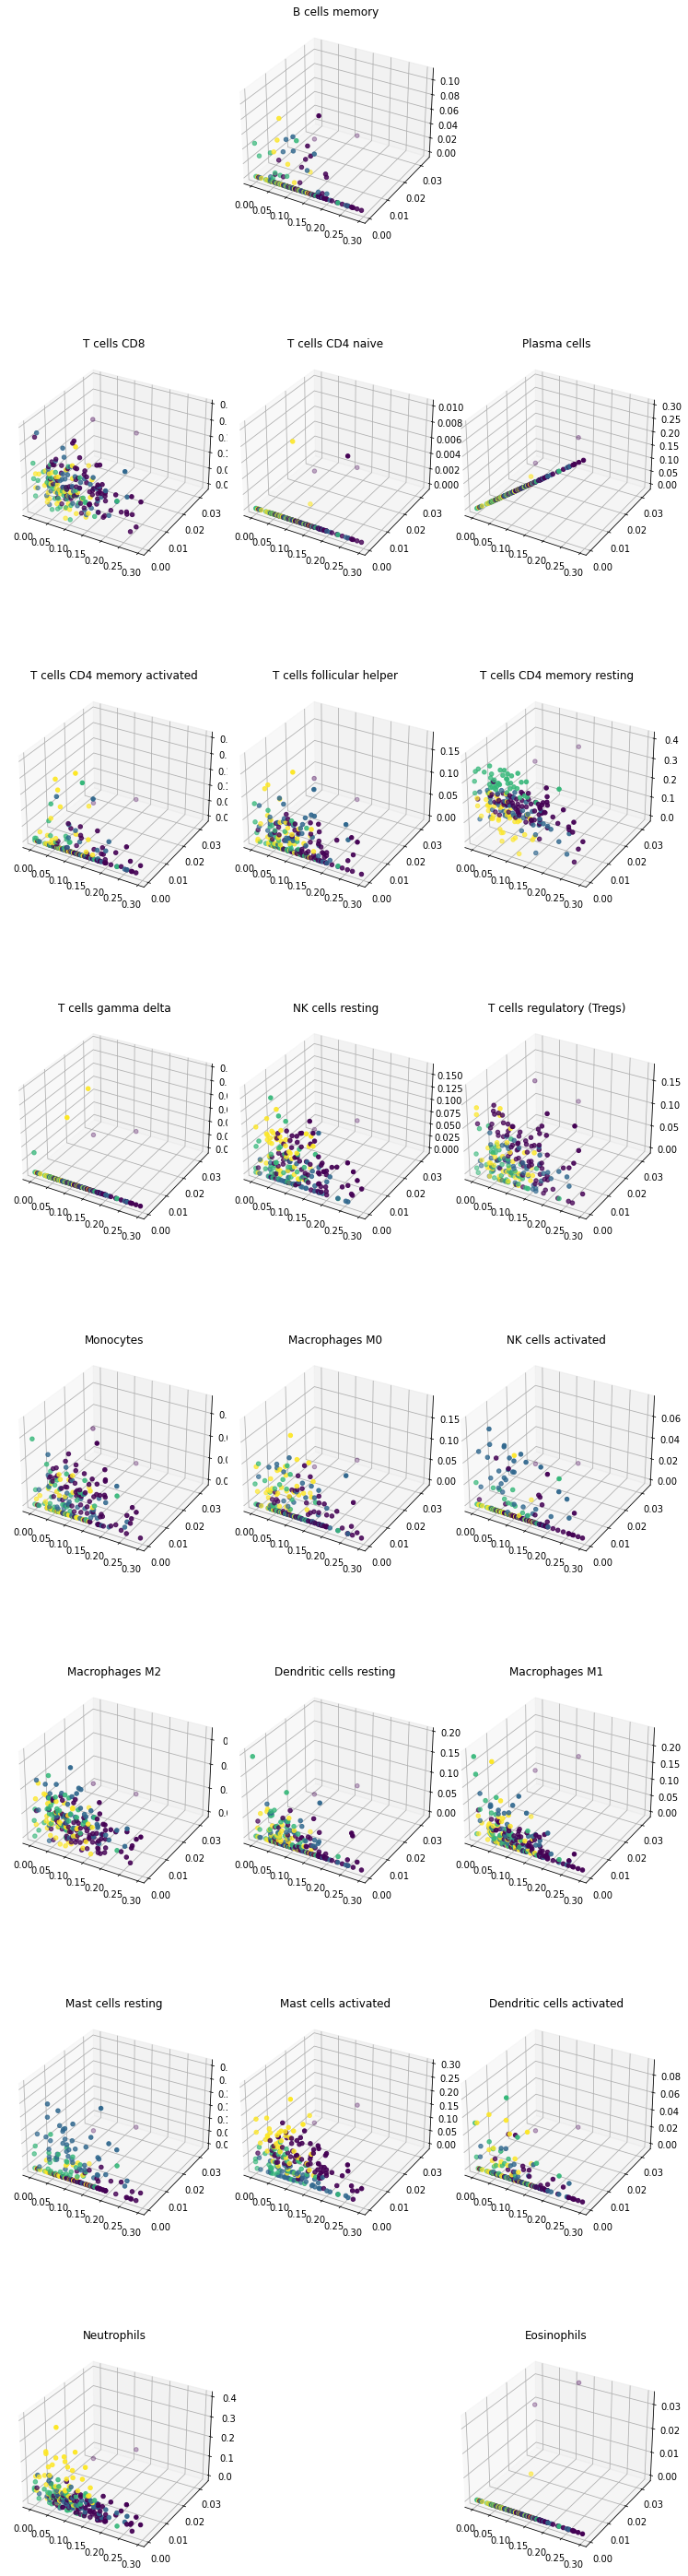

In [473]:
colors = {1.0:'red', 0.0:'blue'}
cell_1 = 2
cell_2 = 20
cell_3 = 5
fig = plt.figure(constrained_layout=True, figsize=(10,40))

gs = GridSpec(ncols=3, nrows=8, figure=fig)
for i in range(1,22):
    ax = fig.add_subplot(gs[round(i/3),i%3], projection='3d')
    ax.scatter(X.iloc[:, cell_1], X.iloc[:,cell_2],X.iloc[:,i],c=km.labels_, cmap='viridis')
    ax.title.set_text(X.iloc[:,i].name);
    
plt.savefig('3dPlots_KMeans.pdf')

### make new cluster-labels list 

In [ ]:
clust = 4
# gives the indeces of the chosen cluster label "clust"
mask = np.where(km.labels_ == clust)
list(mask)[0]
new_labels = [0.] * 218
new_labels[list(mask)[0]] = 1.0


In [ ]:
(target[mask[0]] == 0).sum()

In [ ]:
km_cm = confusion_matrix(target[list(mask)[0]], km.labels_)
ConfusionMatrixDisplay(km_cm).plot()

In [145]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_style("whitegrid")
sns.scatterplot(data=X, x=X.iloc[:,2], y=X.iloc[:,18],size=y,\
                style=target,c=km.labels_,sizes=(80,20));

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 218 and the vector passed to `size` has length 300.

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=cetux, x=cetux.iloc[:,0], y=cetux.iloc[:,11],\
                size=cetux["skin_rash"],style=cetux["skin_rash"],c=km.labels_,sizes=(80,20));

In [ ]:
X_embedded.shape

In [87]:
cell_1 = 1
cell_2 = 0
cell_3 = 2
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X_embedded.iloc[:,cell_2], X_embedded.iloc[:,cell_3],c=cetux['skin_rash'].map(colors));

ValueError: Unrecognized marker style '30'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
km = KMeans(n_clusters=2)
km.fit(X_proj)


In [ ]:
km.cluster_centers_.shape


In [ ]:
cell_1 = 0
cell_2 = 9
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('true colors'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=cetux['skin_rash'].map(colors));

plt.subplot(1,2,2)
plt.title('kmeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=clustering.labels_);

In [ ]:
cell_1 = 0
cell_2 = 8
cell_3 = 7
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X.iloc[:,cell_2], X.iloc[:,cell_3],c=clustering.labels_);

## Ward tree clustering

In [ ]:
from sklearn.cluster import ward_tree
wt = ward_tree(X,n_clusters=20)

In [ ]:
wt

## DBSCAN

In [308]:
#dbscan_clustering = DBSCAN(eps=0.0005, min_samples=4,metric='euclidian').fit(X)
#metric = [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
#dbscan_clustering

db = DBSCAN(eps=0.045, min_samples=5,metric='cosine').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [309]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [310]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 180


In [311]:
len(db.labels_)
db.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1,
        0, -1,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
        0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  0, -1, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1])

In [286]:
#dbscan_cm = confusion_matrix(cetux['skin_rash'], db.labels_)
#ConfusionMatrixDisplay(dbscan_cm).plot()

***After trying with several combinations of eps, min_samples and metric: dbscan is not really detecting clusters! more noise... ***

## Spectral clustering

In [456]:
n_clust = 4
clustering = SpectralClustering(n_clusters=n_clust, assign_labels='kmeans',n_init=50,gamma=5.0).fit(X)
clustering.labels_
#cetux['skin_rash'].to_numpy().astype(np.int32)

array([1, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1, 3, 0, 2, 2, 2, 3, 0, 1, 2, 2, 0,
       3, 2, 3, 1, 2, 1, 1, 1, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 1, 1, 3, 2,
       2, 0, 3, 1, 2, 2, 1, 1, 1, 0, 2, 0, 3, 0, 2, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 0, 3, 0, 3, 2, 1, 1, 1, 1, 2, 2, 2, 3, 0, 3, 1, 2, 2, 3, 1,
       0, 3, 0, 0, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3, 1, 3, 0, 2, 2,
       2, 3, 0, 3, 1, 2, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 1, 2, 3, 1, 2, 3, 1, 3, 3, 0, 1, 1, 0,
       2, 3, 0, 3, 2, 3, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2,
       3, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 3, 2, 2, 0, 3, 0, 3, 1, 2, 3, 3,
       2, 1, 3, 1, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 3, 1],
      dtype=int32)

In [439]:
lst_pred = []

In [440]:
for i in range(n_clust):
    lst_pred.append([1 if z == i else 0 for z in clustering.labels_])

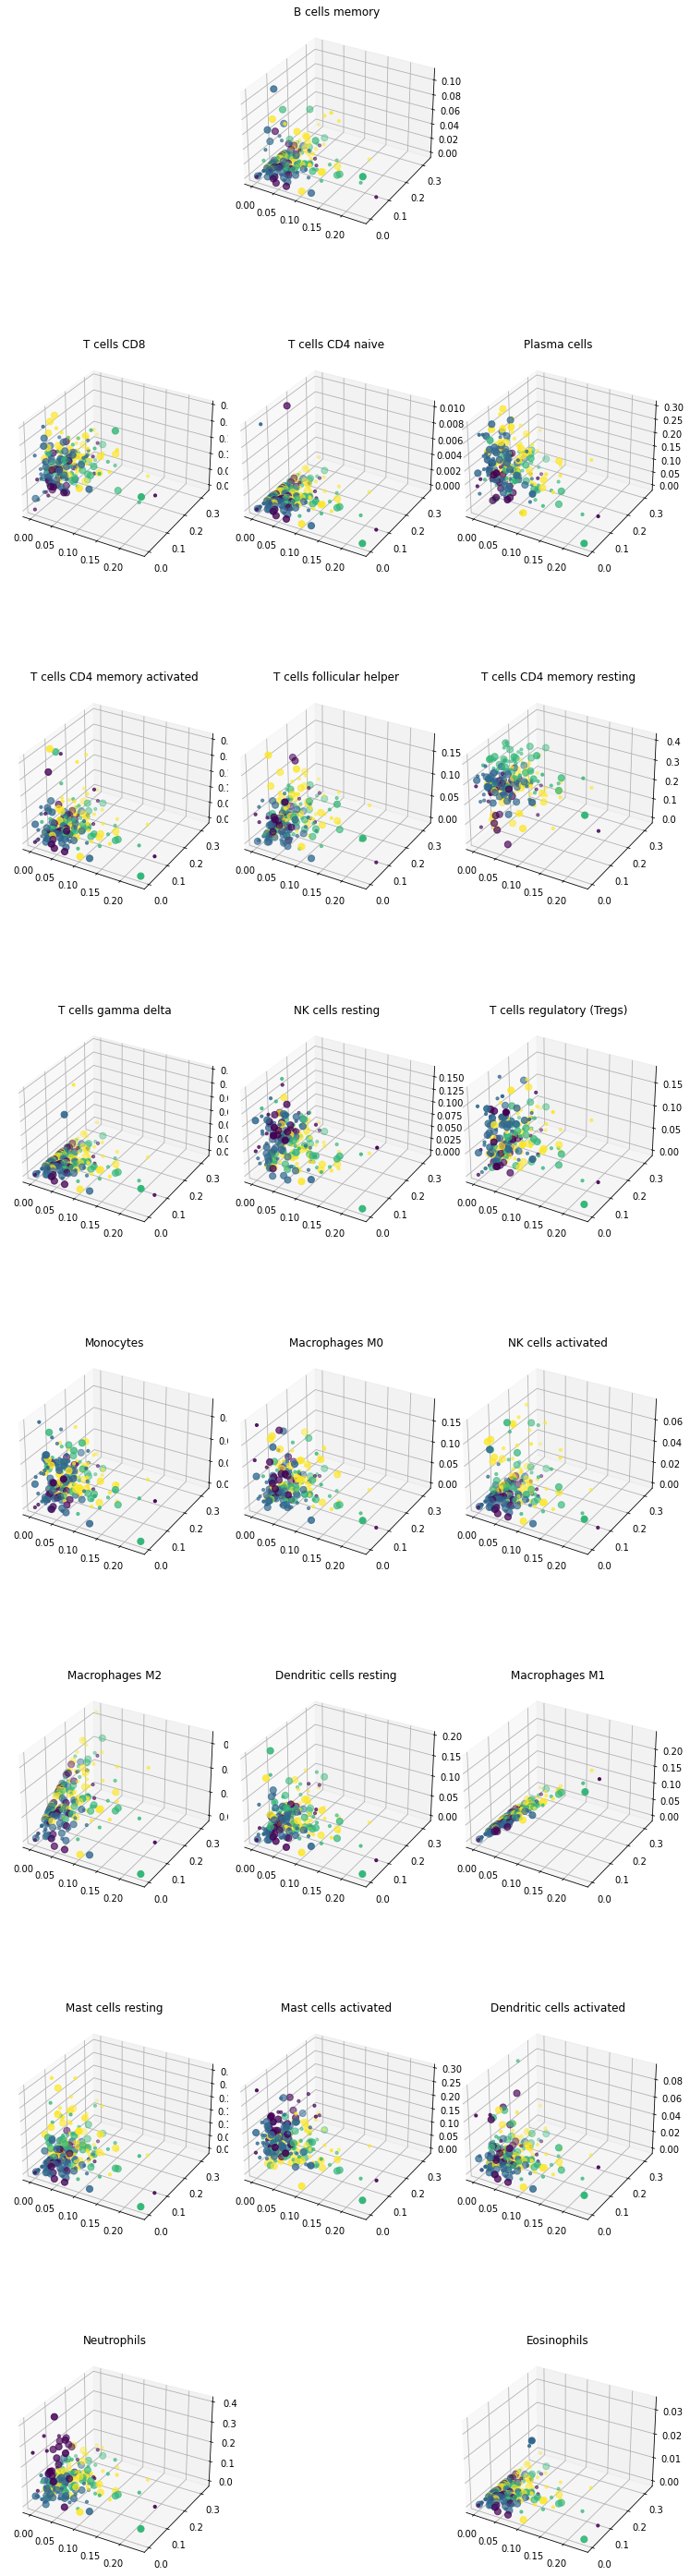

In [496]:
sizes = {1.0:50, 0.0:10}
cell_1 = 14
cell_2 = 15
cell_3 = 5
fig = plt.figure(constrained_layout=True, figsize=(10,40))

gs = GridSpec(ncols=3, nrows=8, figure=fig)
for i in range(1,22):
    ax = fig.add_subplot(gs[round(i/3),i%3], projection='3d')
    ax.scatter(X.iloc[:, cell_1], X.iloc[:,cell_2],X.iloc[:,i],c=clustering.labels_,s=target.map(sizes),cmap='viridis')
    ax.title.set_text(X.iloc[:,i].name);
    
plt.savefig('3dPlots_spectralClustering.pdf')

In [441]:
df_predict = pd.DataFrame(data=lst_pred)

In [442]:
df_pred = df_predict.T
df_pred

0  1
0    0  1
1    0  1
2    1  0
3    1  0
4    1  0
..  .. ..
213  1  0
214  0  1
215  0  1
216  1  0
217  0  1

[218 rows x 2 columns]

In [444]:
(df_pred[1] == 1).sum()

86

TypeError: 'NoneType' object is not iterable

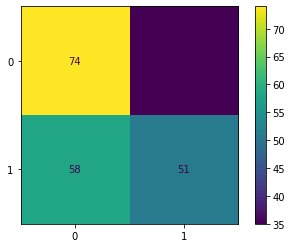

In [445]:
cm = confusion_matrix(target, df_pred[1])
cm
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None).plot()

## Gaussian mixture MODEL/clustering

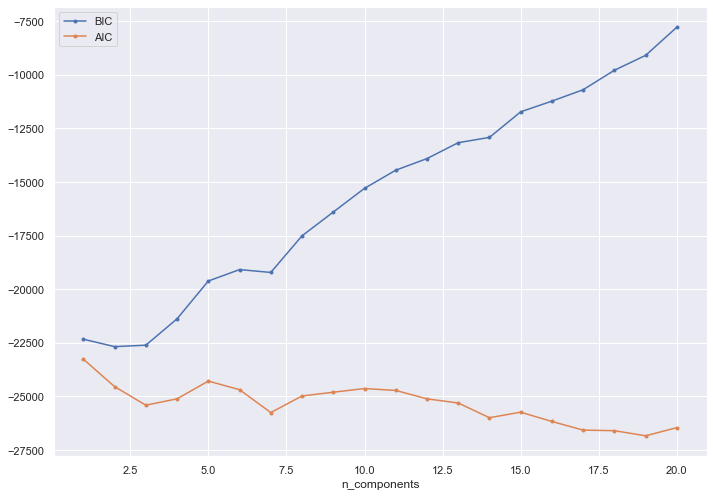

In [160]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [461]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
X = np.array(X)

In [462]:
labels = gmm.predict(X)

In [465]:
X = pd.DataFrame(data=X, columns=features)

In [466]:
X

B cells naive  B cells memory  Plasma cells  T cells CD8  \
0         0.067346        0.000000      0.097330     0.072327   
1         0.000000        0.000000      0.105039     0.066233   
2         0.065798        0.000000      0.118399     0.111458   
3         0.010223        0.000000      0.186072     0.193724   
4         0.000000        0.013582      0.056297     0.080645   
..             ...             ...           ...          ...   
213       0.000000        0.000000      0.214848     0.068667   
214       0.042629        0.000000      0.159207     0.088503   
215       0.062810        0.000000      0.165863     0.111992   
216       0.062652        0.000000      0.107508     0.074588   
217       0.011304        0.000000      0.133997     0.031845   

     T cells CD4 naive  T cells CD4 memory resting  \
0                  0.0                    0.168887   
1                  0.0                    0.249715   
2                  0.0                    0.281396   
3                  0.0                    0.283032   
4                  0.0                    0.336947   
..                 ...                         ...   
213                0.0                    0.240325   
214                0.0                    0.094924   
215                0.0                    0.242714   
216                0.0                    0.188766   
217                0.0                    0.310994   

     T cells CD4 memory activated  T cells follicular helper  \
0                        0.000000                   0.002431   
1                        0.074691                   0.035303   
2                        0.000000                   0.000000   
3                        0.000000                   0.000000   
4                        0.000000                   0.035983   
..                            ...                        ...   
213                      0.000000                   0.000000   
214                      0.000000                   0.064158   
215                      0.000000                   0.000000   
216                      0.000000                   0.025771   
217                      0.054651                   0.000000   

     T cells regulatory (Tregs)  T cells gamma delta  ...  Monocytes  \
0                      0.067972             0.094723  ...   0.000000   
1                      0.085112             0.000000  ...   0.031279   
2                      0.069544             0.000000  ...   0.000000   
3                      0.144012             0.000000  ...   0.007435   
4                      0.057663             0.000000  ...   0.000000   
..                          ...                  ...  ...        ...   
213                    0.016270             0.000000  ...   0.002291   
214                    0.032181             0.000000  ...   0.027582   
215                    0.015493             0.000000  ...   0.009641   
216                    0.034555             0.000000  ...   0.001619   
217                    0.047231             0.000000  ...   0.020362   

     Macrophages M0  Macrophages M1  Macrophages M2  Dendritic cells resting  \
0          0.012340        0.061996        0.019745                 0.071104   
1          0.000000        0.000000        0.065631                 0.000000   
2          0.008250        0.121340        0.005364                 0.024802   
3          0.000000        0.018321        0.014802                 0.000000   
4          0.011481        0.000000        0.167292                 0.079572   
..              ...             ...             ...                      ...   
213        0.029856        0.000000        0.125876                 0.000000   
214        0.059096        0.044513        0.000147                 0.012462   
215        0.026734        0.000000        0.087093                 0.088313   
216        0.000000        0.000000        0.323832                 0.000000   
217        0.072651        0.000000        0.004566          

In [275]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=11, cols=2)
    #subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))
  
    
fig.add_trace(go.Scatter3d(X, x=X.iloc[:,cell_1].name, y=X.iloc[:,cell_2].name, z=X.iloc[:,cell_3].name,
              color=labels, symbol=target,
              opacity=0.7),
              row=0, col=0)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.update_layout(height=500, width=700,
                  title_text="Multiple Subplots with Titles")

fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatter3d 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Scatter3d`

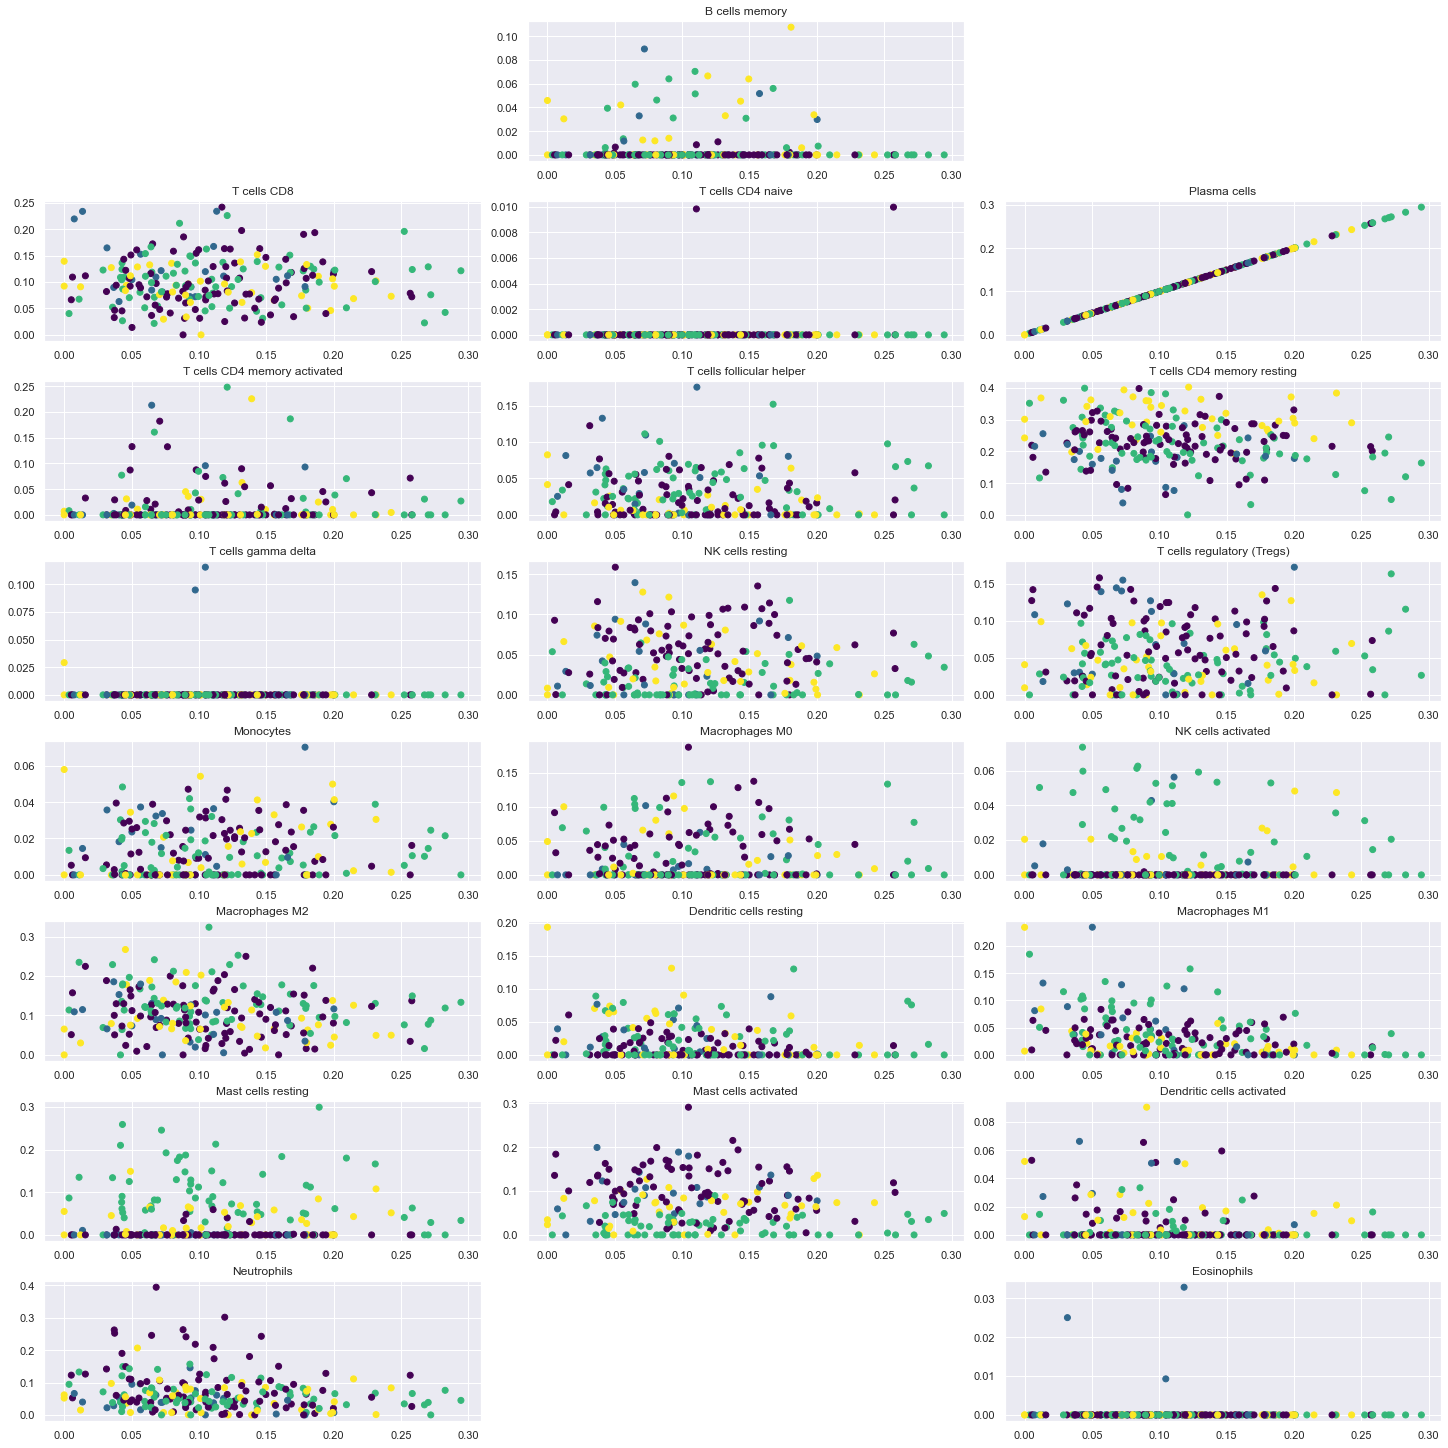

In [276]:
colors = {1.0:'red', 0.0:'blue'}
cell_1 = 2
cell_2 = 20
fig = plt.figure(constrained_layout=True, figsize=(20,20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)
for i in range(1,22):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.scatter(X.iloc[:, cell_1], X.iloc[:,i],c=labels, cmap='viridis')
    ax.title.set_text(X.iloc[:,i].name);
    

In [464]:
X


array([[0.0673456 , 0.        , 0.09732958, ..., 0.18887617, 0.        ,
        0.07492447],
       [0.        , 0.        , 0.10503903, ..., 0.13423012, 0.        ,
        0.07019783],
       [0.06579759, 0.        , 0.11839938, ..., 0.08649459, 0.03282843,
        0.05115452],
       ...,
       [0.06280978, 0.        , 0.16586316, ..., 0.13659869, 0.        ,
        0.04536179],
       [0.0626525 , 0.        , 0.10750836, ..., 0.02983828, 0.        ,
        0.04207362],
       [0.01130353, 0.        , 0.13399732, ..., 0.14625708, 0.        ,
        0.04298479]])

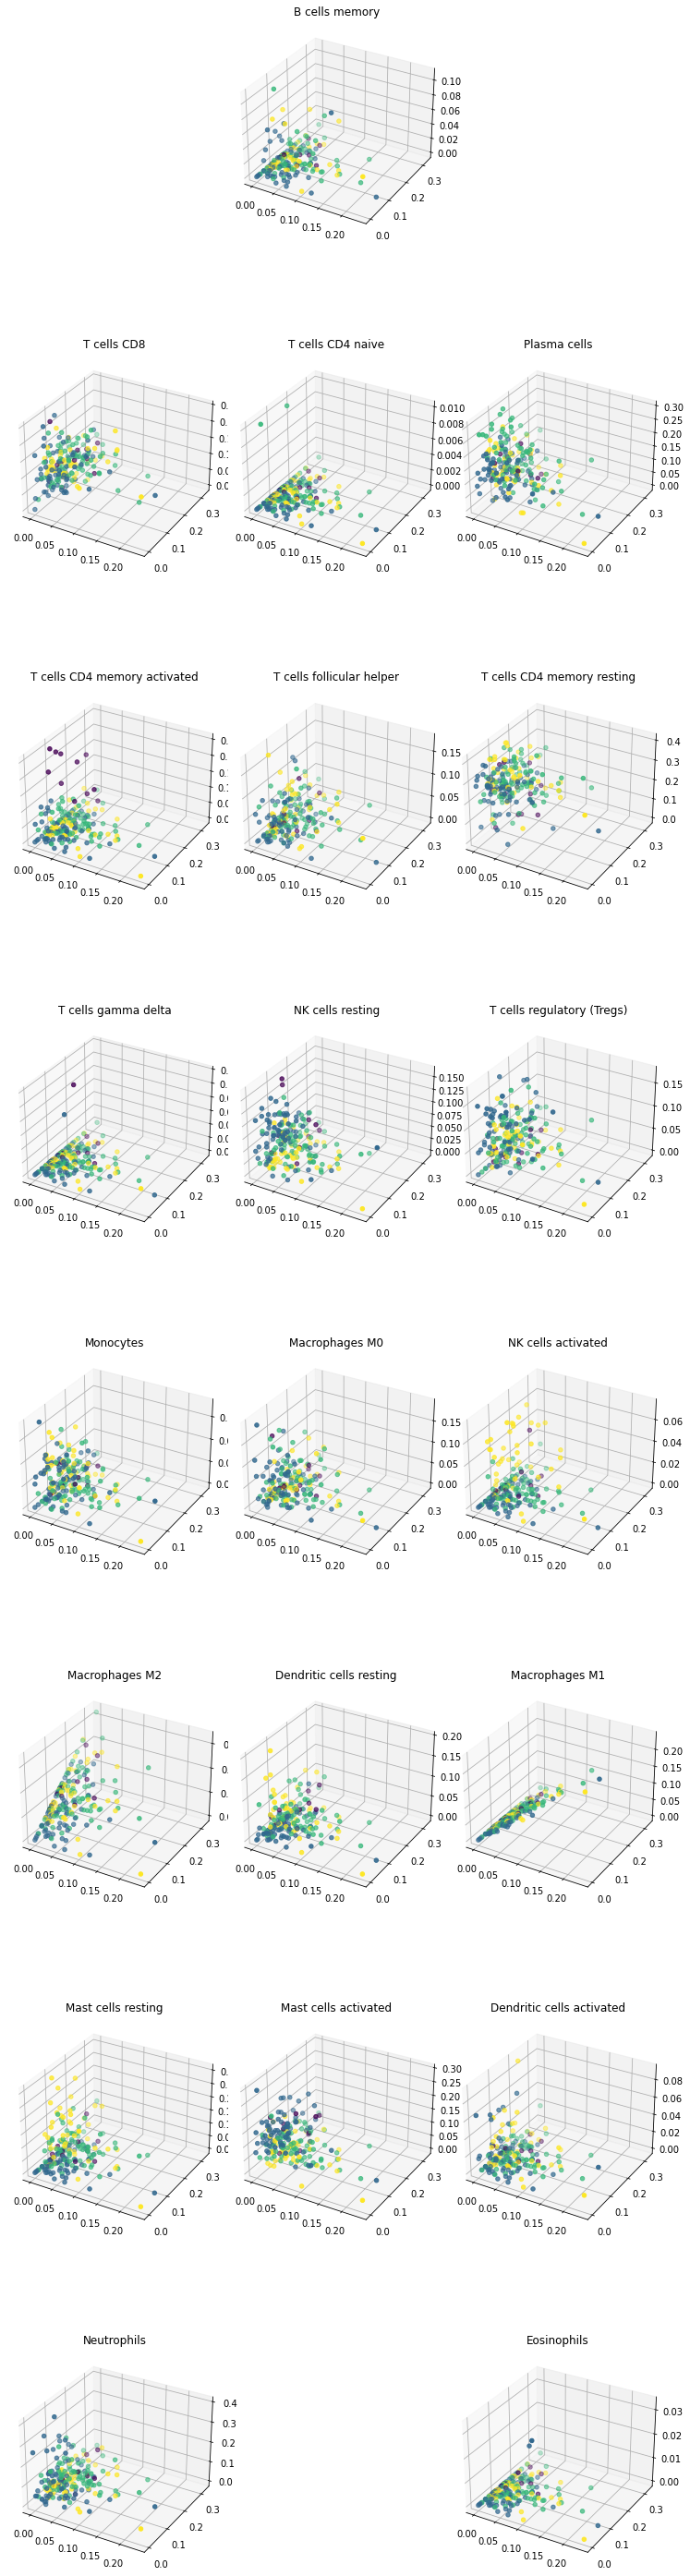

In [489]:
colors = {1.0:'red', 0.0:'blue'}
cell_1 = 14
cell_2 = 15
cell_3 = 5
fig = plt.figure(constrained_layout=True, figsize=(10,40))

gs = GridSpec(ncols=3, nrows=8, figure=fig)
for i in range(1,22):
    ax = fig.add_subplot(gs[round(i/3),i%3], projection='3d')
    ax.scatter(X.iloc[:, cell_1], X.iloc[:,cell_2],X.iloc[:,i],c=labels, cmap='viridis')
    ax.title.set_text(X.iloc[:,i].name);
    
plt.savefig('3dPlots_GaussianMixture.pdf')

In [207]:
gs[0,2]

GridSpec(8, 3)[0:1, 2:3]

In [200]:
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
213    1.0
214    1.0
215    1.0
216    0.0
217    1.0
Name: skin_rash, Length: 218, dtype: float64

In [281]:
unique, counts = np.unique(labels, return_counts=True)
cluster_dict = dict(zip(unique, counts))
cluster_dict

{0: 85, 1: 22, 2: 73, 3: 38}

In [290]:
trick = target*20 + labels
(trick == 20).sum()
rash_dict = {}


In [294]:
rash_dict['2'] = (trick == 22).sum()
print(rash_dict)

{'3': 21, '0': 45, '1': 11, '2': 32}


In [375]:
immune_clinical[immune_clinical.arm == 1.0]["predictedCMS"].fillna(-1)
#immune_clinical["predictedCMS"].fillna(-1)

3      2.0
4      2.0
6     -1.0
7     -1.0
8      1.0
      ... 
433    3.0
435    4.0
436    2.0
438    3.0
441    4.0
Name: predictedCMS, Length: 218, dtype: float64

In [379]:
cell_1 = 2
cell_2 = 15
cell_3 = 10
immune_clinical["predictedCMS"].fillna(0)

fig = px.scatter_3d(X, x=X.iloc[:,cell_1].name, y=X.iloc[:,cell_2].name, z=X.iloc[:,cell_3].name,
              color=labels, symbol=immune_clinical[immune_clinical.arm == 1.0]["predictedCMS"].fillna(0),
              opacity=0.7)

#tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### gaussian mixture model tests

In [151]:
from sklearn.datasets.samples_generator import make_blobs
sns.set()

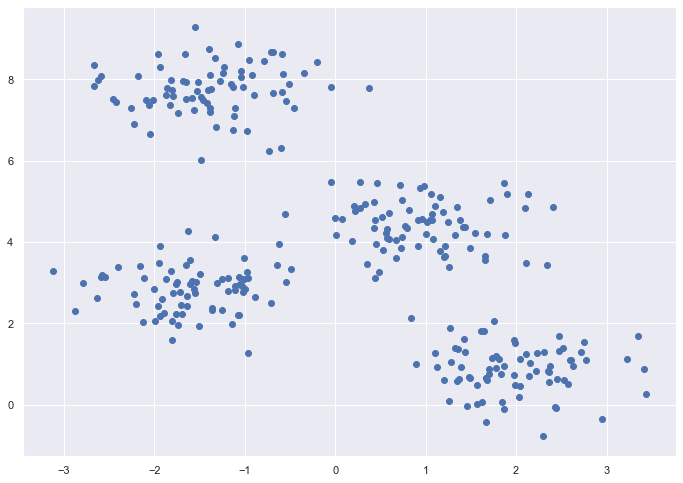

In [154]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X_blobs[:,0], X_blobs[:,1])

In [153]:
#plt.rcParams['lines.marker'] = "."
#plt.rcParams.keys()

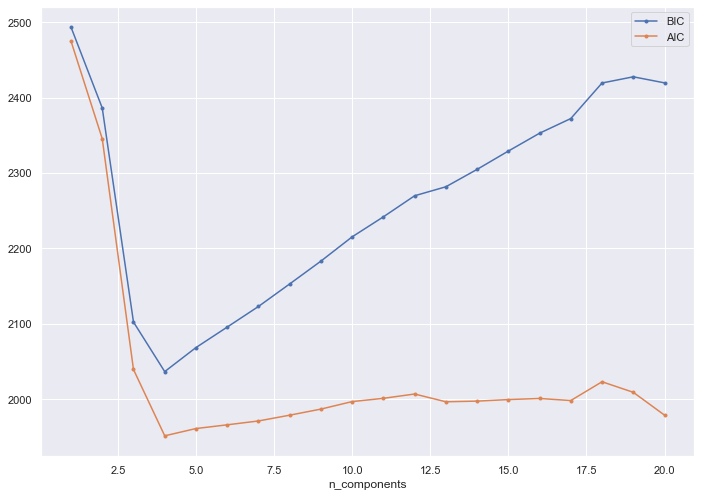

In [156]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_blobs) for n in n_components]
plt.plot(n_components, [m.bic(X_blobs) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_blobs) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [157]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_blobs)
X_blobs = np.array(X_blobs)

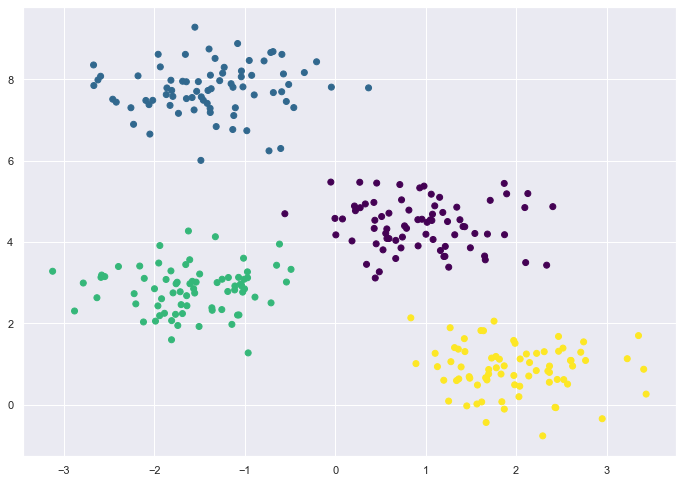

In [159]:
labels = gmm.predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis');


## Agglomerative hierarchical clustering

In [480]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=0).fit(X)#n_clusters=2,linkage="complete",‘complete’, ‘average’, ‘single’

TypeError: 'NoneType' object is not iterable

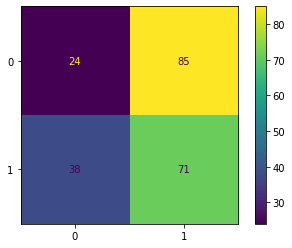

In [453]:
agg_cm = confusion_matrix(cetux['skin_rash'], agg_clustering.labels_)
ConfusionMatrixDisplay(confusion_matrix=agg_cm,display_labels=None).plot();

In [455]:
(agg_clustering.labels_ == 1).sum()

156

In [482]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
from scipy.cluster.hierarchy import dendrogram

In [487]:
len(agg_clustering.children_)

217

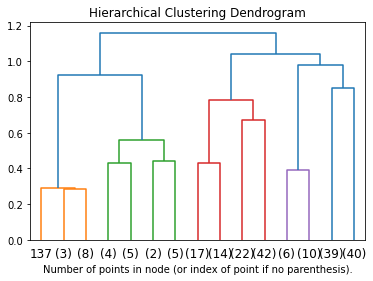

In [483]:
a
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()